# Entrega 2 - Aprendizaje Bayesiano

### Grupo 9:
     - J. Gu       C.I 5.509.557-9
     - M. Nuñez    C.I 5.225.262-3
     - L. Pereira  C.I 5.268.309-4
     





## 1. Objetivo

El objetivo de este informe es implementar y evaluar un modelo basado en aprendizaje bayesiano, y capaz de soportar problemas causados por probabilidades condicionales iguales a cero incorporando un parámetro m, el cual indica el tamaño equivalente de muestra y el cual se utilizará para generar un m-estimador de las probabilidades condicionales. 

Se evaluará las herramientas de metodologías vistas en el curso, evaluando sobre cuales son las más adecuadas en este caso y, en particular, se aplicarán técnicas de feature selection, cross validation, se presentará la matriz de confusión y la curva de precision-recall para todos los casos.


## 2. Diseño

En esta sección se presentaran las evaluaciones de las herramientas de metodologías vistas en el curso aplicadas a este problema, una descripción del procesamiento de datos realizado y los métodos de evaluación utilizados.


### 2.1 Herramientas de metodología

A la hora de trabajar con conjuntos de datos y modelos de clasificación, siempre, sin importar el modelo, es necesario utilizar metodologías que nos aseguren un buen preprocesamiento de los datos, cómo dividir el conjunto de datos para entrenarlo y evaluarlo, qué métricas utilizar a la hora de evaluar el modelo, entre varias otras. En esta sección analizaremos las metodologías vistas en el curso y discutiremos si sería necesario aplicarlos, o no, y por qué.

#### 2.1.1 Preprocesamiento
Lo primero que debemos tener en cuenta al trabajar con conjuntos de datos, es que estos datos probablemente vienen de distintas fuentes, en distintos formatos, y muchas veces varios de los atributos que contienen pueden no ser necesarios al pasarlos por el modelo de clasificación. Por esta razón a veces se debe agrupar, eliminar o alterar el estado de algunos de los datos para transformar nuestro conjunto de datos en uno que se pueda utilizar sin problemas en modelos de clasificación. 
Al utilizar un conjunto de datos suele suceder que:
- El conjunto cuenta con atributos faltantes. Instancias con atributos sin asignación de valor.
- El conjunto cuenta con atributos categóricos representados como Strings (o algún tipo de datos no numérico), lo cual complica el entrenamiento de los modelos luego ya que la mayoría se manejan con atributos numéricos.
- El conjunto cuenta con datos numéricos en distintas escalas, lo cual puede dificultar a algunos modelos.

Estos son algunos problemas generales que pueden surgir al trabajar con conjuntos de datos. Para nuestro caso particular, al trabajar con el conjunto «AIDS Clinical Trials Group Study 175», pudimos ver que éste no contaba con atributos faltantes, todos los atributos tenían algún valor asignado para todas las instancias y tampoco tenía atributos categóricos que no estuvieran representados como númericos. 
Por otro lado, los datos numéricos sí están en distintas escalas, ya que representan distintas características (peso, altura, edad, etc.). Por esta razón es que sería válido, al trabajar con este conjunto de datos en particular, utilizar algún preprocesamiento que normalice los datos, así todos se trabajan en las mismas escalas.

Sin embargo, para el modelo que estamos utilizando en este estudio, precisamos que todos los datos sean categóricos. Por lo tanto, es innecesario normalizar los valores numéricos ya que luego igualmente los estaremos categorizando con un método de discretización.

#### 2.1.1 División del conjunto
Tras haber preprocesado los datos y tenerlos en un formato que sirva para el modelo que estamos utilizando, debemos elegir cómo vamos a dividir nuestro conjunto de datos para utilizar una sección de entrenamiento y otra de evaluación. Ante esto hay dos enfoques:
- Por un lado podemos dividir, de manera azarosa, nuestro conjunto de datos en un 80%-20% o 70%-30% para entrenamiento y evaluación respectivamente.
- Por otro lado, podemos utilizar validación cruzada. En este caso se divide el conjunto de datos en 5, y se realizan 5 recorridas distintas, en cada una se utiliza una partición distinta para evaluación y las restantes 4 para entrenamiento. Tras hacer las 5 recorridas se promedia los valores obtenidos del rendimiento del modelo y esos son los que se utilizan para el análisis posterior.

Para este caso particular vamos a utilizar ambos tipos de división para realizar distintos analisis. Por un lado, utilizaremos validación cruzada para obtener los resultados de precisión, recall y acierto promedios entre todos los pliegues y las matrices de confusión. Por otro lado, utilizaremos la división estándar de 80%-20% para graficar las curvas de precision-recall. La razón del por qué de ambas decisiones se explica más adelante en este informe.

A su vez, otro factor que debemos decidir en estos momentos, es si utilizaremos selección de atributos. Esta es una técnica que se utiliza para analizar si todos los atributos que componen al conjunto tienen el mismo peso en los modelos, y en caso de que se descubra que alguno no tiene ningún efecto, o su efecto no impacta mucho, se pueden remover del conjunto para mejorar la eficiencia e incluso los resultados.
Ante esto, decidimos aplicar pruebas de Chi-Cuadrado comparando cada atributo con la etiqueta, y viendo cuales atributos están relacionados con la etiqueta de alguna forma y cuales es mas probable que fueran casualidad las relaciones que mantienen.

#### 2.1.1 Evaluación

A la hora de evaluar precisamos definir que métricas vamos a utilizar para visualizar el desempeño de nuestro modelo. Para esto hay varias métricas disponibles que nos brindan distinta información, entre estas se encuentran:
- Acierto: El acierto identifica cuántas instancias se clasificaron correctamente, ya sea de la clase positiva o la negativa.
- Precisión: La precisión indica cuántas instancias que se clasificaron de la clase positiva, de verdad eran de esa clase.
- Recall: El recall indica cuántas de las instancias positivas, se clasificaron efectivamente como positivas.
- Medida-F: Es una medida que combina los valores de precisión y recall en un solo valor, para medir el desempeño en base a éste.

Para este laboratorio vemos como coherente utilizar los valores de acierto, precisión y recall. También se podría utilizar la medida-f para visualizar un único valor en base a lo obtenido del recall y la precisión, pero para este trabajo no lo estaremos utilizando.
Además, para acompañar a estas métricas, utilizaremos matrices de confusión para ver de forma más visual los resultados obtenidos de cada clase (falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos) y también graficaremos las curvas de precisión-recall para visualizar como se desempeña nuestro algoritmo a medida que se va variando un determinado valor de límite. Esto último cabe destacar que lo podemos utilizar en este caso ya que nuestro modelo bayesiano permite calcular el porcentaje de confiabilidad con el cual se tiene certeza del etiquetado que se está realizando. Si estuvieramos trabajando con otro tipo de modelos que no permite obtener estos valores, como lo es árboles de decisión, estas curvas no podrían trazarse. 

### 2.2 Preprocesamiento de datos

Para nuestro laboratorio, comenzamos obteniendo el conjunto de datos y realizando una limpieza inicial. La primera acción fue eliminar la columna 0, que correspondía al identificador del paciente. Esta columna no aportaba información relevante para la predicción, ya que es simplemente un identificador único y no tiene correlación con las características de salud que queremos evaluar.

A continuación, aplicamos la discretización a los atributos continuos utilizando la clase KBinsDiscretizer de la biblioteca sklearn, la cual discretiza los valores en un número fijo de bins. Esto es importante ya que el algoritmo Naive Bayes, en su forma básica, opera sobre datos categóricos, por lo que es necesario convertir los valores continuos en categorías discretas. Para este caso, elegimos discretizar en tres bins utilizando la estrategia de distribución quantile, lo que permite dividir los valores en tres intervalos con misma cantidad de elementos en cada uno.

In [16]:
#Importaciones
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Cargar el dataset con encabezados
DATASET_FILE = 'lab2_dataset.csv'
dataset = pd.read_csv(DATASET_FILE, sep=",")

# Guardar los nombres de las columnas
column_names = dataset.columns[1:]  # Excluir la primera columna (ID del paciente)

# Eliminar la primera columna (ID del paciente)
dataset = dataset.drop(dataset.columns[0], axis=1)

# Definir las columnas categóricas manualmente
columnas_categoricas = [1, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18]

# Extraer los atributos y la etiqueta
atributos = dataset.iloc[:, 1:].values  # Todas las columnas menos la primera (la etiqueta)
etiqueta = dataset.iloc[:, 0].values    # Primera columna como etiqueta

#### Aplicamos la discretización de los atributos continuos:



In [18]:
# Aplicar la discretización solo a las columnas continuas
for col in range(atributos.shape[1]):
    if col not in columnas_categoricas:
        # Crear un KBinsDiscretizer para discretizar los valores continuos de esta columna en específico
        discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
        
        # Discretizar la columna continua
        atributos[:, col:col+1] = discretizer.fit_transform(atributos[:, col:col+1])

# Convertir `etiqueta` a una forma de columna para la concatenación
etiqueta_columna = etiqueta.reshape(-1, 1)

# Conatenar `etiqueta` con los atributos discretizados
dataset_discretizado = np.hstack([etiqueta_columna, atributos])

# Ajustar los nombres de las columnas
column_names_discretizado = ['etiqueta'] + list(column_names[1:])

# Convertir el array discretizado en un DataFrame
dataset_discretizado_df = pd.DataFrame(dataset_discretizado, columns=column_names_discretizado)

c:\Users\lpereira\Documents\GitHub\AA-2024\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\lpereira\Documents\GitHub\AA-2024\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(



  #### 2.1.2 Selección de atributos

  Una vez discretizados los atributos, aplicamos la prueba de chi-cuadrado (chi2) sobre los atributos categóricos. Esta técnica nos permitió identificar qué columnas tenían una relación estadísticamente significativa con la variable objetivo (la etiqueta de clasificación). Las columnas cuyos p-valores resultaron mayores a 0.05 fueron consideradas irrelevantes para la predicción y, por tanto, candidatas a ser eliminadas. La decisión del valor 0.05 fue tomada tras investigar y notar que es un valor estándar que se utiliza al aplicar selección de atributos.
  Esta técnica de selección de características es crucial para reducir la dimensionalidad del modelo y evitar el sobreajuste.

In [19]:
# Definir la variable objetivo
y = dataset['cid'] 

# Definir manualmente las columnas categóricas
columnas_categoricas = ['time','trt','age','wtkg', 'hemo', 'homo', 'drugs','karnof', 'oprior', 'z30', 'zprior','preanti','race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt','cd40','cd420','cd80','cd820']

# Seleccionar las columnas categóricas que ya son numéricas
X_categoricas_encoded = dataset_discretizado_df[columnas_categoricas]

# Aplicar la prueba de Chi-cuadrado
chi_scores, p_values = chi2(X_categoricas_encoded, y)

# Mostrar los resultados del Chi-cuadrado para las columnas categóricas
print("\nPrueba de Chi-cuadrado para columnas categóricas:")
for i, col in enumerate(columnas_categoricas):
    print(f"Columna: {col}, Chi-cuadrado: {chi_scores[i]}, p-valor: {p_values[i]}")

print("\n Tras las Pruebas Chi-cuadrado, las columnas a eliminar son:")
for i, col in enumerate(columnas_categoricas):
    if p_values[i] > 0.05:
        print(f"Columna a borrar: {col}")


Prueba de Chi-cuadrado para columnas categóricas:
Columna: time, Chi-cuadrado: 488.6743706473722, p-valor: 2.7685651782692086e-108
Columna: trt, Chi-cuadrado: 12.727324961369058, p-valor: 0.0003603516000424519
Columna: age, Chi-cuadrado: 3.530659763429805, p-valor: 0.06024381147396335
Columna: wtkg, Chi-cuadrado: 0.20869545857474434, p-valor: 0.6477918171431243
Columna: hemo, Chi-cuadrado: 0.2437032164540472, p-valor: 0.6215441578565497
Columna: homo, Chi-cuadrado: 2.1359663906960566, p-valor: 0.14387976345739725
Columna: drugs, Chi-cuadrado: 4.606804351787607, p-valor: 0.03184532471773235
Columna: karnof, Chi-cuadrado: 0.40199611088424436, p-valor: 0.526060178570954
Columna: oprior, Chi-cuadrado: 3.5598055788336604, p-valor: 0.0591946717300646
Columna: z30, Chi-cuadrado: 15.148901863277914, p-valor: 9.935608318167467e-05
Columna: zprior, Chi-cuadrado: 0.0, p-valor: 1.0
Columna: preanti, Chi-cuadrado: 12.383517719323615, p-valor: 0.0004331403512192935
Columna: race, Chi-cuadrado: 4.76

Finalmente, con el conjunto de datos discretizado y los atributos irrelevantes eliminados, el dataset quedó preparado para la fase de entrenamiento y validación cruzada del modelo Naive Bayes. Este paso garantiza que el modelo será evaluado con un conjunto de características relevantes, maximizando su capacidad predictiva sin añadir ruido innecesario.

### 2.3 Consideraciones sobre algoritmo bayesiano
Para implementar el algoritmo bayesiano, nos basamos fuertemente en el algoritmo visto en el teórico del curso. No realizamos grandes modificaciones con respecto a este, pero las que se realizaron se documentan en este informe a continuación.

#### 2.3.1 Uso de logaritmos para el cálculo de probabilidades
El cambio con respecto al algoritmo original de Bayes, y que igualmente también fue diseñado a partir de lo visto en teórico, es la utilización de logaritmos a la hora de calcular las probabilidades condicionales en la fórmula de predicción. Esto se utiliza ya que en el algoritmo original se realiza una productoria de probabilidades condicionales, lo que en la práctica, dado la esencia de las probabilidades, genera multiplicaciones de varios números entre 0 y 1. Por esto, al trabajar en un entorno computacional, que sabemos tiene problemas de precisión cuando los valores son muy chicos, debemos tener cuidado de que la computadora no aproxime a cero alguno de los valores que estamos multiplicando que sea muy cercano a cero y que por ende la probabilidad nos termine quedando en cero, cuando en verdad esto no es real.

Para mitigar esto utilizamos el concepto de los logaritmos, ya que estos se manejan en un dominio de (-inf, 0), lo que nos permite transformar los números entre 0 y 1 en números mas grandes en cuanto a magnitud y seguir mantiendo el orden que se tenía. A su vez, podemos transformar las multiplicaciones de las probabilidades en sumas, dado que el logaritmo del producto de dos probabilidades equivale a la suma de los logaritmos de esas probabilidades calculadas por separado. 

Con este cambio, seguimos respetando la relación que tienen las probabilidades entre ellas pero nos desaparece el riesgo generado por la precisión de las computadoras, permitiendonos trabajar de una forma más segura con nuestro conjunto de datos.

Sin embargo, dado que queremos graficar curvas de precision-recall, esto solamente es posible si tenemos disponibles los valores de probabilidad condicional reales, no los logaritmos. Por esta razón, a diferencia del resto de cálculos que sí utilizan los logaritmos, para calcular las curvas de precision-recall se utiliza la fórmula original, con lo cual como resultado devolvemos la probabilidad de suceso de la clase positiva.

#### 2.3.2 ¿Cómo decidimos si una instancia es positiva o negativa?
Una vez construido el modelo, se debe tener en cuenta cómo se va a decidir la clase de una instancia. 
Ante esto visualizamos dos posibilidades: 
- Por un lado se podría calcular la probabilidad condicional de que una instancia sea de una cierta clase dados los atributos de la instancia, hacer esto para todas las clases posibles, y quedarnos con la clase que tenga la mayor probabilidad entre todas las analizadas.
- Por otro lado, se podría normalizar las probabilidades condicionales de cada clase encontrada, tomando la suma de estas como 1, y luego calculando la probabilidad de que la clase sea positiva en base a esa normalización. Esto nos daría un número entre 0 y 1, que si multiplicamos por 100 nos daría el porcentaje de probabilidad de que esa clase sea positiva. Si apartir de esto definimos un valor con el cual decidimos que si una instancia tiene mayor probabilidad que dicho valor la clasificamos como positivo y si tiene probabilidad menor a ese valor la clasificamos como negativo, tendríamos otra forma de clasificar nuestras instancias apartir del algoritmo bayesiano. Otra forma de verlo es que si definimos un umbral de 60% (por ejemplo), entonces nuestra instancia positiva debería tener más de 60% de probabilidad de suceder para que la clasifiquemos como positiva.

Ante estas dos posibilidades se decidió ir con la primera opción. La decisión se tomó teniendo en cuenta que esta forma fue la vista mayormente en el teórico del curso, y que también, como se mencionó en la sección 2.3.1, al trabajar con logaritmos de probabilidades, esta normalización que se menciona en el punto 2 es mas compleja y el cálculo no queda de manera tan directa.

## 2.4 Evaluación
En esta sección, evaluamos el desempeño del modelo Naive Bayes implementado, entrenándolo y probándolo con diferentes valores del hiperparámetro m (tamaño equivalente de muestra). Para asegurar una evaluación robusta y evitar sobreajuste, utilizamos validación cruzada con 5 pliegues. A continuación, se presentan las métricas clave utilizadas para evaluar el modelo, las justificaciones para su uso, y una interpretación de los resultados obtenidos.

### 2.4.1 Validación cruzada
Utilizamos 5 pliegues para dividir los datos en conjuntos de entrenamiento y prueba, lo que nos permite obtener una estimación más precisa de cómo funcionará el modelo en datos no vistos. Este enfoque garantiza que cada parte del dataset se utilice tanto para el entrenamiento como para la evaluación, lo que reduce la varianza en los resultados y ofrece una visión más confiable del rendimiento general del modelo.

### 2.4.2 Métricas y herramientas utilizadas
Para evaluar el rendimiento del modelo, utilizamos las siguientes métricas: acierto, precisión, recall. Para su evaluacion, las siguientes herramientas de evaluacion: la matriz de confusión y la curva precision-recall. Estas son particularmente útiles en problemas de clasificación donde no solo importa la cantidad de predicciones correctas, sino también cómo se distribuyen los errores.

#### Acierto
El acierto mide el porcentaje de predicciones correctas sobre el total de predicciones realizadas. Es una métrica común en problemas de clasificación, especialmente cuando las clases están balanceadas. Se define como:
$$
\text{Acierto} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}
$$
#### Precision
La precisión mide la proporción de verdaderos positivos entre todas las predicciones positivas realizadas por el modelo. En problemas donde los falsos positivos son costosos o perjudiciales, como en el diagnóstico médico, esta métrica es especialmente importante.
La métrica de precisión se define como:
$$
\text{Precisión} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Positivos}}
$$
#### Recall

El recall, o sensibilidad, mide la proporción de verdaderos positivos entre todas las muestras que realmente pertenecen a la clase positiva. Esta métrica es crucial cuando el costo de los falsos negativos es alto, es decir, cuando queremos minimizar los casos en los que fallamos al identificar una clase importante.

La métrica de recall se define como:
$$
\text{Recall} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Negativos}}
$$

#### Matriz de confusión
La matriz de confusión proporciona una representación completa del rendimiento del modelo y permite identificar desequilibrios en la clasificación, como una alta tasa de falsos positivos o falsos negativos. Sin embargo, puede ser difícil de interpretar si el número de clases es muy grande.
#### Curva Precision-Recall

La curva precision-recall es una herramienta visual útil para observar la compensación entre la precisión y el recall a diferentes umbrales de decisión. Es particularmente valiosa en problemas de clasificación binaria con clases desbalanceadas, ya que ofrece una visión más detallada del rendimiento del modelo que una sola métrica.

Para la curva de precision-recall, decidimos realizar el mismo preprocesamiento que utilizamos en el laboratorio 1, utilizando un 20% del dataset para prueba y un 80% para el entrenamiento, ya que vimos que realizar una curva por pliegue para cada valor de m no provocaba gran variación en los resultados.

### Evaluación con Diferentes Valores de m

Se entrenó el modelo Naive Bayes con los valores de m igual a 1, 10, 100 y 1000, y se evaluó utilizando las métricas mencionadas. El parámetro m controla el tamaño equivalente de la muestra, afectando la suavización en las probabilidades calculadas por el modelo.

#### Impacto del Hiperparámetro m

m = 1: El valor más bajo de m puede hacer que el modelo sea más propenso a sobreajustarse a las muestras específicas del conjunto de entrenamiento, ya que las probabilidades no se suavizan lo suficiente.

m = 10 y 100: Estos valores permiten una mejor suavización de las probabilidades, lo que tiende a mejorar la generalización del modelo en datos no vistos.

m = 1000: Con un valor muy alto de m, se corre el riesgo de que el modelo subajuste, ya que las probabilidades están demasiado suavizadas, lo que puede reducir su capacidad para capturar patrones relevantes en los datos.

## 3. Experimentación

En las siguientes tablas se presentan los resultados obtenidos, mostrando acierto, precisión, desviación estándar y recall de los cinco pliegues. Generados por la validación cruzada para el algoritmo Naive Bayes con distintos m valores. En lugar de detallar los resultados individuales de cada pliegue, solo se exponen los promedios y las desviaciones estándar del acierto promedio. Por otro lado, también se encuentran los resultados del algoritmo ID3 y sus variaciones para poder comparar los distintos modelos.

Decidimos nuevamente evaluar el algoritmo sobre los datos de entrenamiento para poder detectar posible sobreajuste al conjunto.

La Tabla 1 muestra los resultados obtenidos para el algoritmo Naive Bayes con diferentes valores de m y el algoritmo ID3 con diferentes configuraciones de max_range_split, utilizando datos preprocesados, mientras que la Tabla 2 incluye los resultados de DecisionTreeClassifier, RandomForestClassifier y el algoritmo ID3 sobre datos procesados en tiempo de ejecución. Por último, en la Tabla 3 podemos encontrar la precisión y el recall del modelo Naive Bayes para los distintos valores de m.

<table>
  <tr>
    <th>Algoritmo</th>
    <th>Datos utilizados para pruebas</th>
    <th>Acierto promedio (%)</th>
    <th>Desviación estándar</th>
  </tr>
  <tr>
    <td>ID3 (max_range_split = 2)</td>
    <td>Entrenamiento</td>
    <td>98.04</td>
    <td>0.12</td>
  </tr>
  <tr>
    <td>ID3 (max_range_split = 2)</td>
    <td>Evaluación</td>
    <td>83.31</td>
    <td>1.13</td>
  </tr>
  <tr>
    <td>ID3 (max_range_split = 3)</td>
    <td>Entrenamiento</td>
    <td>98.04</td>
    <td>0.12</td>
  </tr>
  <tr>
    <td>ID3 (max_range_split = 3)</td>
    <td>Evaluación</td>
    <td>83.31</td>
    <td>1.13</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1)</td>
    <td>Entrenamiento</td>
    <td>84.22</td>
    <td>0.50</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1)</td>
    <td>Evaluación</td>
    <td>83.54</td>
    <td>0.79</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 10)</td>
    <td>Entrenamiento</td>
    <td>84.24</td>
    <td>0.49</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 10)</td>
    <td>Evaluación</td>
    <td>83.59</td>
    <td>0.72</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 100)</td>
    <td>Entrenamiento</td>
    <td>84.02</td>
    <td>0.60</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 100)</td>
    <td>Evaluación</td>
    <td>83.59</td>
    <td>0.91</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1000)</td>
    <td>Entrenamiento</td>
    <td>83.16</td>
    <td>0.47</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1000)</td>
    <td>Evaluación</td>
    <td>82.84</td>
    <td>0.91</td>
  </tr>
  <caption>Tabla 1 - Resultados de ID3 y Naive Bayes con datos preprocesados</caption>
</table>


<table>
  <tr>
    <th>Algoritmo</th>
    <th>Acierto promedio (%)</th>
    <th>Desviación estándar</th>
  </tr>
  <tr>
    <td>DecisionTreeClassifier (criterion = 'gini')</td>
    <td>85.46</td>
    <td>1.55</td>
  </tr>    
  <tr>
    <td>DecisionTreeClassifier (criterion = 'entropy')</td>
    <td>83.50</td>
    <td>1.07</td>
  </tr>    
  <tr>
    <td>DecisionTreeClassifier (criterion = 'log_loss')</td>
    <td>83.50</td>
    <td>1.07</td>
  </tr>
  <tr>
    <td>RandomForestClassifier (criterion = 'gini')</td>
    <td>89.15</td>
    <td>1.22</td>
  </tr>    
  <tr>
    <td>RandomForestClassifier (criterion = 'entropy')</td>
    <td>89.20</td>
    <td>1.34</td>
  </tr>    
  <tr>
    <td>RandomForestClassifier (criterion = 'log_loss')</td>
    <td>89.20</td>
    <td>1.34</td>
  </tr>
  <tr style="font-weight:bold">
    <td>ID3 (max_range_split = 2)</td>
    <td>84.15</td>
    <td>1.21</td>
  </tr>    
  <tr style="font-weight:bold">
    <td>ID3 (max_range_split = 3)</td>
    <td>84.38</td>
    <td>1.34</td>
  </tr>  
  <caption>Tabla 2 - Resultados de ID3 y variaciones, con datos de evaluación procesados durante la ejecución</caption>
</table>


<table>
  <tr>
    <th>Algoritmo</th>
    <th>Datos utilizados para pruebas</th>
    <th>Precisión promedio (%)</th>
    <th>Recall promedio (%)</th>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1)</td>
    <td>Entrenamiento</td>
    <td>78.65</td>
    <td>78.26</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1)</td>
    <td>Evaluación</td>
    <td>77.75</td>
    <td>77.22</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 10)</td>
    <td>Entrenamiento</td>
    <td>78.68</td>
    <td>78.31</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 10)</td>
    <td>Evaluación</td>
    <td>77.81</td>
    <td>77.32</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 100)</td>
    <td>Entrenamiento</td>
    <td>78.42</td>
    <td>77.74</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 100)</td>
    <td>Evaluación</td>
    <td>77.87</td>
    <td>77.01</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1000)</td>
    <td>Entrenamiento</td>
    <td>80.00</td>
    <td>70.43</td>
  </tr>
  <tr>
    <td>Naive Bayes (m = 1000)</td>
    <td>Evaluación</td>
    <td>79.50</td>
    <td>69.82</td>
  </tr>
  <caption>Tabla 3 - Resultados de Precisión y Recall en Naive Bayes con diferentes valores de m</caption>
</table>


Las curvas de precision-recall para los distintos m se muestran a continuación, con el valor de AUC (Area under the curve) para cada una.

![Texto alternativo](.\images\m1.png)
![Texto alternativo](.\images\m10.png)
![Texto alternativo](.\images\m100.png)
![Texto alternativo](.\images\m1000.png)

A continuación se presentan los valores de la matriz de confusión para m = 1 y m = 1000 para el pliegue 1. Notamos que las matrices de confusión de m = 10 y m = 100 son muy similares a la de m = 1 por lo que decidimos excluirlas de este informe. Sin embargo, todos los datos, incluidos los de los demás pliegues, se encuentran disponibles en el código python adjunto a esta entrega.

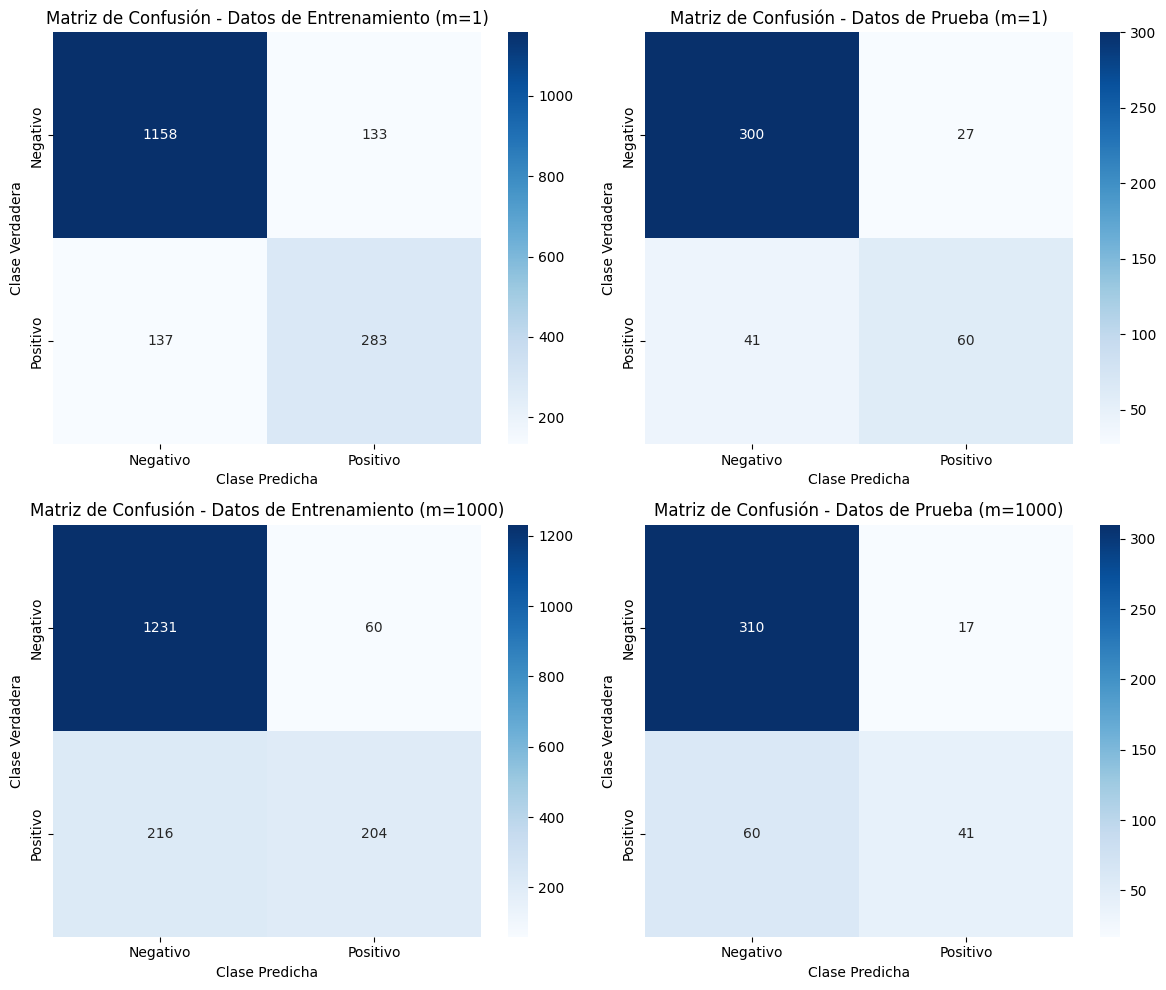

In [20]:
# Datos de la matriz de confusión para entrenamiento con m=1
confusion_matrix_train_m1 = [[1158, 133], [137, 283]]

# Datos de la matriz de confusión para prueba con m=1
confusion_matrix_test_m1 = [[300, 27], [41, 60]]

# Datos de la matriz de confusión para entrenamiento con m=1000
confusion_matrix_train_m1000 = [[1231, 60], [216, 204]]

# Datos de la matriz de confusión para prueba con m=1000
confusion_matrix_test_m1000 = [[310, 17], [60, 41]]

# Crear un gráfico con cuatro subgráficos
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico de la matriz de confusión - Datos de Entrenamiento (m=1)
sns.heatmap(confusion_matrix_train_m1, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"], ax=ax[0, 0])
ax[0, 0].set_title("Matriz de Confusión - Datos de Entrenamiento (m=1)")
ax[0, 0].set_xlabel("Clase Predicha")
ax[0, 0].set_ylabel("Clase Verdadera")

# Gráfico de la matriz de confusión - Datos de Prueba (m=1)
sns.heatmap(confusion_matrix_test_m1, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"], ax=ax[0, 1])
ax[0, 1].set_title("Matriz de Confusión - Datos de Prueba (m=1)")
ax[0, 1].set_xlabel("Clase Predicha")
ax[0, 1].set_ylabel("Clase Verdadera")

# Gráfico de la matriz de confusión - Datos de Entrenamiento (m=1000)
sns.heatmap(confusion_matrix_train_m1000, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"], ax=ax[1, 0])
ax[1, 0].set_title("Matriz de Confusión - Datos de Entrenamiento (m=1000)")
ax[1, 0].set_xlabel("Clase Predicha")
ax[1, 0].set_ylabel("Clase Verdadera")

# Gráfico de la matriz de confusión - Datos de Prueba (m=1000)
sns.heatmap(confusion_matrix_test_m1000, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"], ax=ax[1, 1])
ax[1, 1].set_title("Matriz de Confusión - Datos de Prueba (m=1000)")
ax[1, 1].set_xlabel("Clase Predicha")
ax[1, 1].set_ylabel("Clase Verdadera")

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()


## 4. Conclusión

En este laboratorio, hemos implementado y evaluado un modelo de clasificación basado en el algoritmo bayesiano, extendido para soportar atributos no vistos en los datos de entrenamiento mediante el hiperparámetro m. También hemos definido qué herramientas de metodología utilizaríamos al estudiar dicho modelo, hemos analizado métricas como curva de precision-recall, matriz de confusión, recall, acierto y precisión, y hemos comparado los resultados obtenidos con los modelos utilizados en el laboratorio anterior.

### 4.1 Análisis de modelos bayesianos con distintos m:
En primer lugar, podemos comparar los resultados del modelo bayesiano con los distintos valores m utilizados.
Si comparamos los valores de acierto, vemos que el mejor valor obtenido es un acierto promedio de 83.59% y una desviación estándar de 0.72 para m = 10. Sin embargo, estos valores no varían mucho entre los distintos valores, si bien m = 100 es el mayor, el resto se encuentra relativamente cerca de estos valores, por lo que se podría decir que los resultados en cuanto a acierto son similares. Sí se nota una disminución, aunque sigue siendo leve, en m = 1000.
En cuanto a la precisión promedio, vemos que el mejor valor obtenido es una precisión de 79.5% para m = 1000. Nuevamente, los valores del resto de hiperparámetros m utilizados no varía tanto, por lo que no se nota una distinguida diferencia entre los modelos. 
Lo que sí notamos que varía bastante entre modelos es el recall promedio. Se nota como a medida que sube la precisión, baja el recall, pero la diferencia de recall promedio entre el modelo con mejor precisión (m=1000) y el de peor precisión (m=1) es de 7.4%, mientras que la diferencia entre las precisiones de dichos modelos es de 1.75%.
En cuanto a las curvas precision-recall y las matrices de confusión, para los distintos valores de m notamos que la diferencia es mínima. El mayor valor de AUC en las curvas se da para m = 1 con 0.689, pero la diferencia con el peor (m=1000) es de 0.036. Y por otro lado, a la hora de visualizar las matrices de confusión, notamos lo mismo, si bien hay diferencias, no son tan grandes como para generar un gran impacto en el modelo.

En conclusión, notamos que los hiperparámetros utilizados se comportan de forma bastante similar, con alguna variación mínima entre uno y otro. Lo que sí cabe destacar, es como disminuye el recall a medida que aumenta la precisión entre un modelo y otro. Pudimos ver que el modelo con mejor precisión y el de peor precisión tenían una diferencia de 1.75% en precisión y 7.4% en recall, lo que nos mostraría que al intentar mejorar la precisión en un 1%, estamos perdiendo recall en un 7%. 
A la hora de utilizar estos modelos, habría que tener en cuenta el objetivo para el cual se utilizan las predicciones, y en ese momento valorar si la ganancia de un poco más de precisión vale la pérdida de recall que conlleva.

### 4.1 Comparación con árboles de decisión:

Dado que en el primer laboratorio, la única métrica utilizada para la evaluación de resultados fue el acierto, al comparar nuestros modelos bayesianos con los modelos del laboratorio anterior, nos debemos guiar por dicha métrica. 
Teniendo esto en cuenta, los mejores resultados en términos de acierto, siguen siendo los obtenidos con el modelo RandomForestClassifier, particularmente utilizando el criterio entropy y log_loss, alcanzando una precisión promedio cercana al 89.20% y con una desviación estándar relativamente baja.

En cuanto a la comparación con el algoritmo ID3 previamente implementado, vemos que en el caso en el que preprocesamos los valores, el algoritmo Naive Bayes resulta de un acierto promedio levemente superior y una desviación estándar más baja. Si comparamos con el algoritmo ID3 sin preprocesar, vemos que este se comporta mejor. Esta comparación sin preprocesamiento igualmente creemos que no es del todo justa para Naive Bayes, ya que al preprocesar los valores en éste, estamos perdiendo información que podría ser útil para mejorar los valores, mientras que ID3, al poder utilizar los valores continuos reales, tiene mas información a su disposición.

Por otro lado, vemos que el acierto en datos de entrenamiento es cercano al 100% en todos los algoritmos basados en árboles de decisión, mientras que en Naive Bayes es cercano al 83-84%. Con esto podemos concluir que, a diferencia de los árboles de decisión, Naive Bayes no sufre de sobreajuste, ya que el acierto en los datos de entrenamiento es levemente superior al de los datos de evaluación, cosa que en árboles de decisión se notaba mucho mas la superioridad de acierto al predecir sobre los datos de entrenamiento que sobre los datos de evaluación.

### 4.3 Posibles Mejoras:
Para mejorar los resultados, podrían considerarse las siguientes acciones:

Optimización del hiperparámetro m: Aunque solo se evaluaron los valores 1, 10, 100 y 1000, podría ser útil explorar otros valores de m. Si bien manejamos valores de distintas magnitudes, puede que exista algún valor intermedio que sea óptimo.

Implementación de suavizado de Laplace: Se podría investigar como varían los resultados si en lugar de utilizar un m-estimador, se utilizara suavizado de Laplace para los valores que se desea predecir y que no fueron vistos por los datos de entrenamiento.

Criterio de decisión: Se podría investigar como varían los resultados si en lugar de tomar la decisión de clasificar con la clase que mayor probabilidad tenga, agregaramos un parámetro de aceptación, e hicieramos que si la clase positiva tuviera mayor probabilidad que dicho parámetro se clasifique como positiva a la instancia, y sino no.

Método de categorización: Cómo método de categorización de atributos continuos en este trabajo se utilizó la discretización. Sin embargo, se podría utilizar otros métodos, como One Hot Encoding u otros similares, para analizar si los resultados varían. Creemos que en la discretización utilizada se puede estar perdiendo bastante información que podría resultar valiosa a la hora de utilizar los modelos.

Incorporación de otros métodos de validación: Aunque ya se utilizó validación cruzada en este laboratorio, implementar técnicas de validación más exhaustivas, como la búsqueda de hiperparámetros con validación cruzada en cada iteración, podría optimizar aún más los resultados.

### 4.4 Conclusión General:
El trabajo realizado permitió una comprensión profunda de cómo el modelo de Naive Bayes pueden ser aplicado y ajustadosa un conjunto de datos real. 

Por un lado, el haber implementado el algoritmo y haber conseguido un desempeño aceptable, similar al obtenido en ID3, nos permitió entender como un algoritmo sencillo de implementar, como lo es Naive Bayes, igualmente puede tener un desempeño muy bueno. 

Por otro lado, aunque el algoritmo Naive Bayes demostró ser similar al algoritmo ID3 implementado en el laboratorio anterior, los modelos más avanzados de scikit-learn, como RandomForestClassification, demostraron ser más robustos y precisos en este contexto, lo que continúa remarcando la importancia de considerar técnicas más complejas en problemas de clasificación cuando se dispone de datos suficientemente grandes y variados y se quiere tener la mayor precisión posible.